## Ganyu Chen

# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [6]:
df['DIFF'] = df['Adj Close'].diff().shift(-1)

df['Target'] = np.sign(df['DIFF'])
df['Premium'] = .08* df['Adj Close']

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [8]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [9]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30", :].copy()

In [11]:
# fit a log reg
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [12]:
y_pred = logreg.predict(X)

In [13]:
df['Predictions'] = y_pred

In [14]:
df['Profits'] = 0

In [18]:
df.loc[(df['Target'] == 1) & (df['Predictions'] == 1),'Profits'] = df['Premium'] 
df.loc[(df['Target'] == -1) & (df['Predictions'] == 1),'Profits'] = (100 *df['DIFF'])+df['Premium'] 

# 5.) Plot profits over time

[]

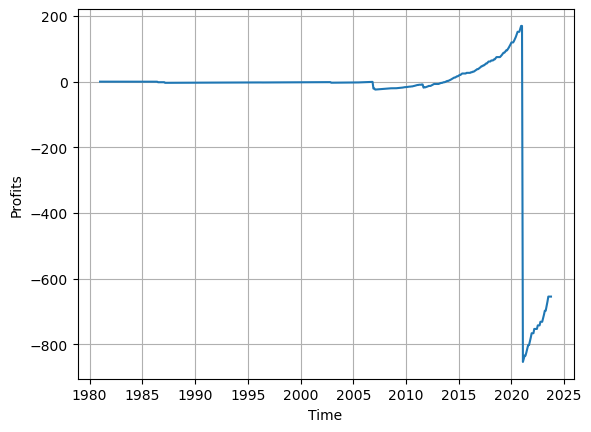

In [19]:
plt.plot(np.cumsum(df['Profits']))
plt.grid()
plt.xlabel('Time')
plt.ylabel('Profits')
plt.plot()

 ## 5.5) short write up about how your skills valuable to PJ or Philip Liu

For Philip Liu, positioning and pitching DGX Cloud requires a strategic approach leveraging key machine learning skills and problem-solving mindset. Useful ML methods such as logistic regression, classification and other data science skills can help better understand customer needs, tailoring the pitch to address specific challenges.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.